<a href="https://colab.research.google.com/github/OscarLan18/Trabajos_programacion/blob/main/Algoritmos_con_Abalone_DB_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Metodos de analisis con data set Abalone** 

# Preparación y estudio de conjunto datos

En esta sección se realiza la preparación de los datos que se usarán en los distintos metodos, realizando la validación de datos faltantes, tipos de datos, histrogramas y otras funciones utiles que nos mostrarán las caracteristicas del conjunto de datos.

Se carga el conjunto de datos desde la repositorio de conjuntos de datos UCI. Adicionalmente, se declaran los nombres de las columnas (atributos)

In [1]:
import pandas as pd
import numpy as np

columns = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', names = columns)
df_ANN = df
df_NB = df_ANN
df.shape

(4177, 9)

Se imprimen las tres primeras y últimas filas para verificar la estructura del conjunto de datos

In [2]:
df.head(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9


In [3]:
df.tail(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.308,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.296,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.495,12


Con la función de descripción se obtiene información estadistitica general del conjunto de datos como el recuento, media, estándar, mínimo, máximo, así como percentiles inferior, 50 y superior. De forma predeterminada, el percentil inferior es 25 y el percentil superior es 75. El percentil 50 es igual a la mediana.

In [4]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Con lo anterior, se encuentra que en el atributo de altura existen pobablemente uno o más valores en cero. Por lo que se realiza el conteo de valor en cero del atributo "Height".

In [5]:
df[df.Height == 0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


Se encuentra que existen dos columnas con valor de cero. Debido a que son solo dos valores se realiza la eliminación de estos. Posteriormente, se realiza nuevamente la descripción para validar.


In [6]:
df = df[df.Height !=0]
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4175.000000,4175.00000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000
mean,0.524065,0.40794,0.139583,0.829005,0.359476,0.180653,0.238834,9.935090
std,0.120069,0.09922,0.041725,0.490349,0.221954,0.109605,0.139212,3.224227
min,0.075000,0.05500,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.35000,0.115000,0.442250,0.186250,0.093500,0.130000,8.000000
50%,0.545000,0.42500,0.140000,0.800000,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.48000,0.165000,1.153500,0.502000,0.253000,0.328750,11.000000
max,0.815000,0.65000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Se verifica la cantidad total de datos distribuidas en filas y columnas

In [7]:
df.shape 

(4175, 9)

Se muestran las columnas o atributos de la Base de datos con su correspondiente tipo de dato

In [8]:
df.columns 
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

Se verifica que no existan valores faltantes en algun atrobito, esto como fase de prepsración de datos y obtener resultados correctos

In [9]:
df.isna().mean().to_frame(name='% of missing values') # No missing values

,% of missing values
Sex,0.0
Length,0.0
Diameter,0.0
Height,0.0
Whole weight,0.0
Shucked weight,0.0
Viscera weight,0.0
Shell weight,0.0
Rings,0.0


Se validan los atributos númericos y categoricos que tiene la base de datos. Finalmnete, se visualiza la información general del conjunto de datos, donde se muestra el nombre del atributo, cantidad de datos y tipo de dato.

In [10]:
nf = df.select_dtypes(include=[np.number]).columns
cf = df.select_dtypes(include=[np.object_]).columns

In [11]:
nf

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [12]:
cf

Index(['Sex'], dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4175 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4175 non-null   object 
 1   Length          4175 non-null   float64
 2   Diameter        4175 non-null   float64
 3   Height          4175 non-null   float64
 4   Whole weight    4175 non-null   float64
 5   Shucked weight  4175 non-null   float64
 6   Viscera weight  4175 non-null   float64
 7   Shell weight    4175 non-null   float64
 8   Rings           4175 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 326.2+ KB


**Visualización de atributos**

A partir de los histogramas que se generan a continuación se visualiza la distribución de los datos de cada uno de los atributos del conjunto de datos

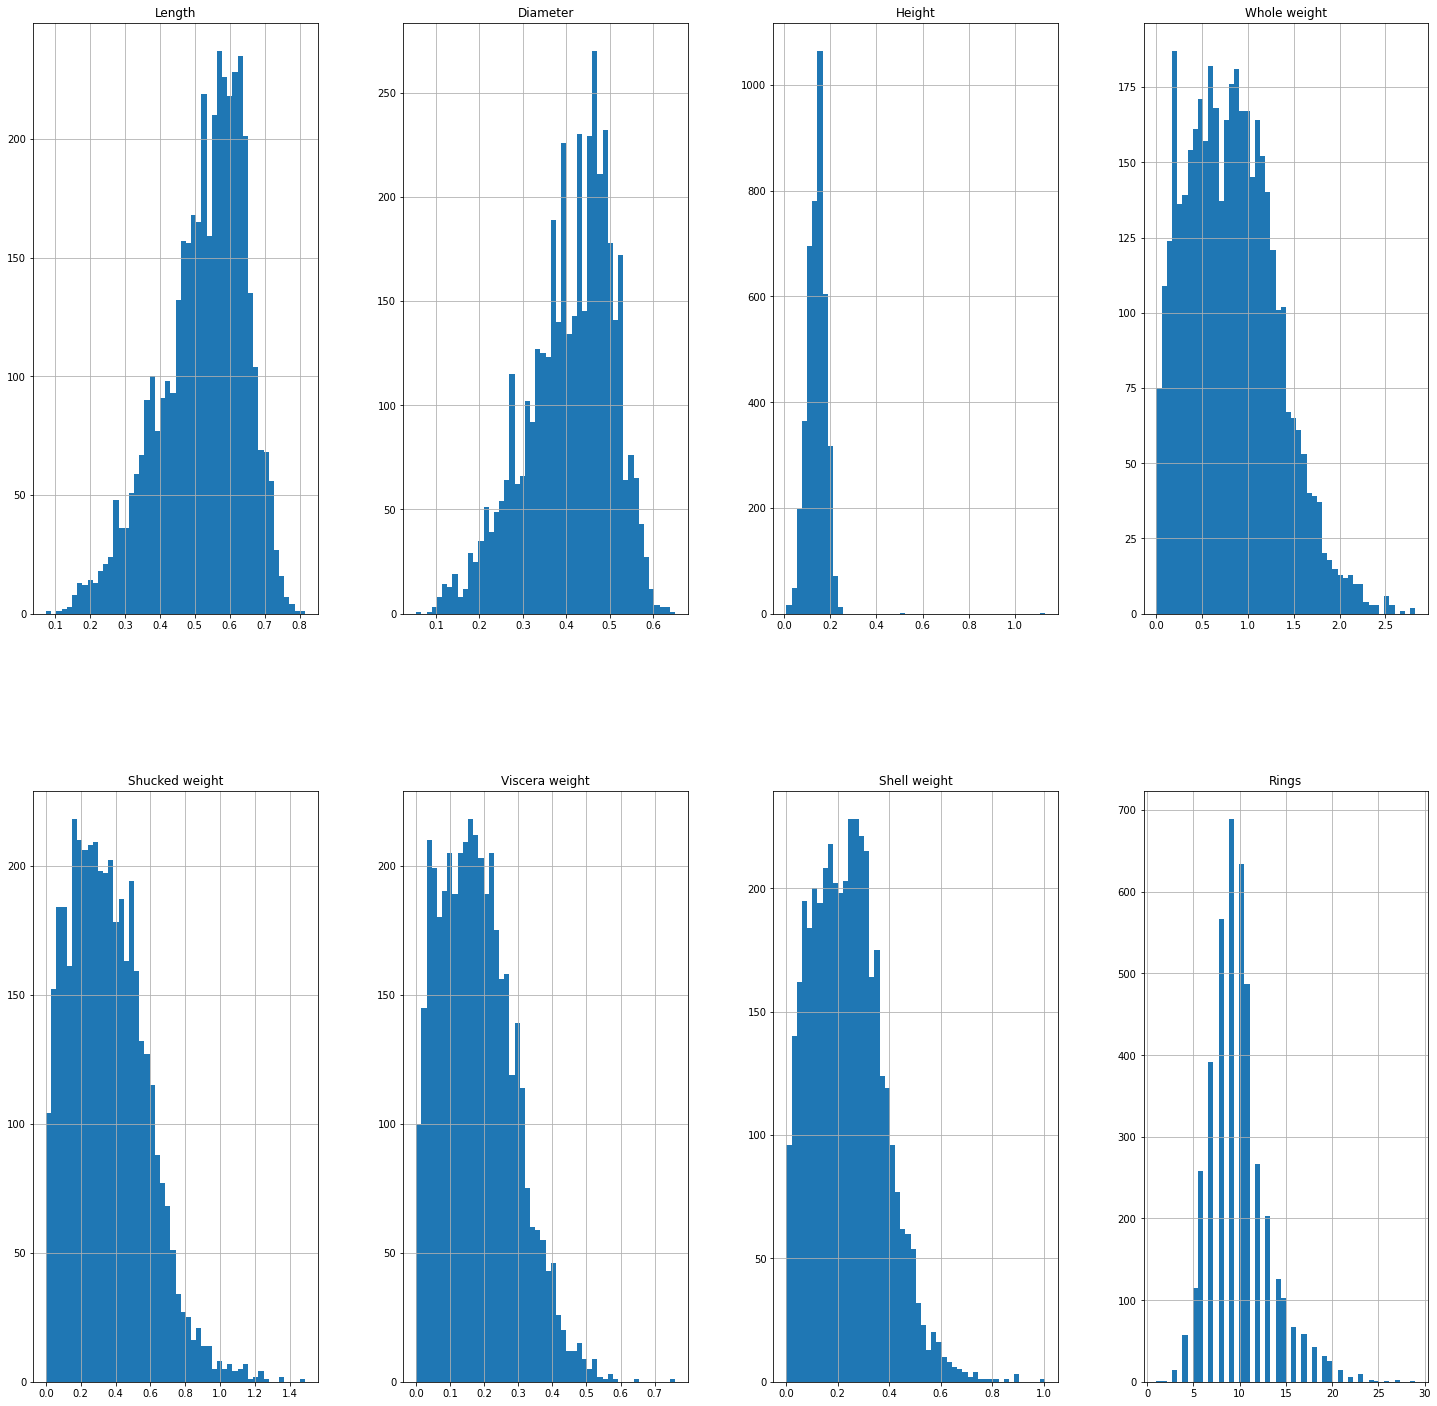

In [14]:
import matplotlib.pyplot as plt
df.hist(figsize=(25,25), grid = True, layout = (2,4), bins = 50)
plt.show()

Se utiliza la función corr() para encontrar la correlación por pares de todas las columnas en Pandas del dataframe. 

Nota: Cualquier valor de vacio se excluye automáticamente

Referencia: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html


In [15]:
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986802,0.828108,0.925217,0.897859,0.902960,0.898419,0.556464
Diameter,0.986802,1.000000,0.834298,0.925414,0.893108,0.899672,0.906084,0.574418
Height,0.828108,0.834298,1.000000,0.819886,0.775621,0.798908,0.819596,0.557625
Whole weight,0.925217,0.925414,0.819886,1.000000,0.969389,0.966354,0.955924,0.540151
Shucked weight,0.897859,0.893108,0.775621,0.969389,1.000000,0.931924,0.883129,0.420597
Viscera weight,0.902960,0.899672,0.798908,0.966354,0.931924,1.000000,0.908186,0.503562
Shell weight,0.898419,0.906084,0.819596,0.955924,0.883129,0.908186,1.000000,0.627928
Rings,0.556464,0.574418,0.557625,0.540151,0.420597,0.503562,0.627928,1.000000


Se importa libreria seaborn para visualizar la correlación en tabla de color para facilitar el entendimiento

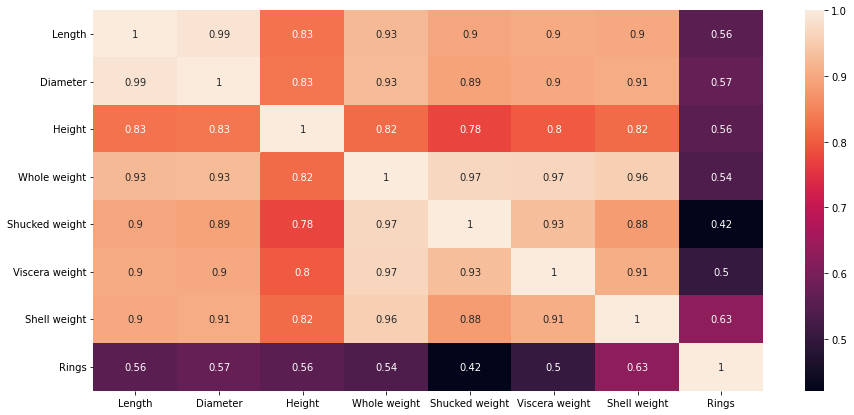

In [16]:
import seaborn as sns

fig,ax = plt.subplots()
fig.set_size_inches(15,7)
sns.heatmap(df.corr(),annot=True,ax=ax)
plt.show()

Con lo anterior se evidencia que la correlación más alta que existe entre el No. de anillos (atributo que se quiere predecir) es el peso del cascarón (Shell weight) con 0.63, seguido del diamentro con 0.57. 

Sin embargo, la correlación más alta que existe es la de el peso de viscera con peso desmembrado (Shucked weight). 

A continuación se resume la correlación de acuerdo con el atributo Rings

In [17]:
df.corr().Rings.sort_values(ascending=False)

Rings             1.000000
Shell weight      0.627928
Diameter          0.574418
Height            0.557625
Length            0.556464
Whole weight      0.540151
Viscera weight    0.503562
Shucked weight    0.420597
Name: Rings, dtype: float64

La función pairplot crea una cuadrícula de ejes de modo que cada variable numérica en los datos se compartirá en los ejes y en una sola fila y los ejes x en una sola columna. Las gráficas diagonales se tratan de manera diferente: se dibuja una gráfica de distribución univariada para mostrar la distribución marginal de los datos en cada columna.

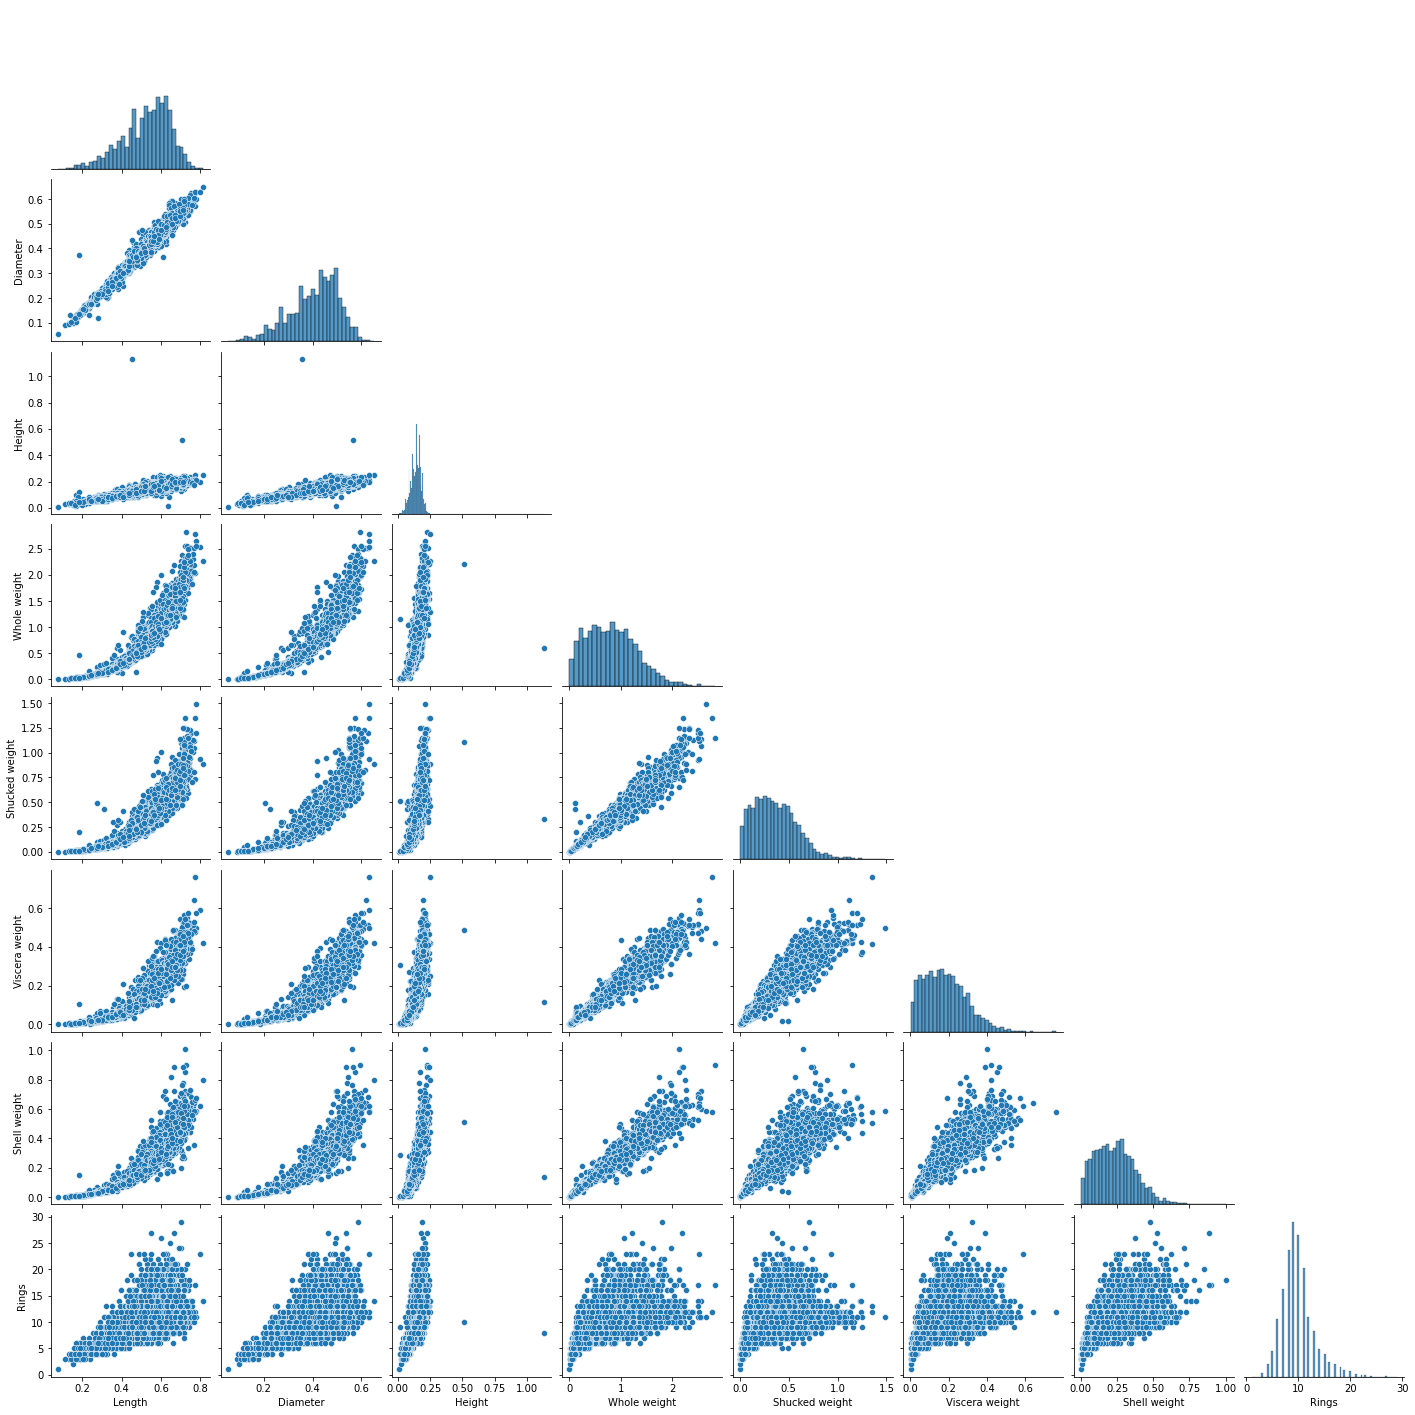

In [18]:
sns.pairplot(df, corner=True)

La asignación de la variable "hue" agrega un mapeo semántico y cambia la gráfica marginal predeterminada a una estimación de densidad del kernel en capas (KDE):

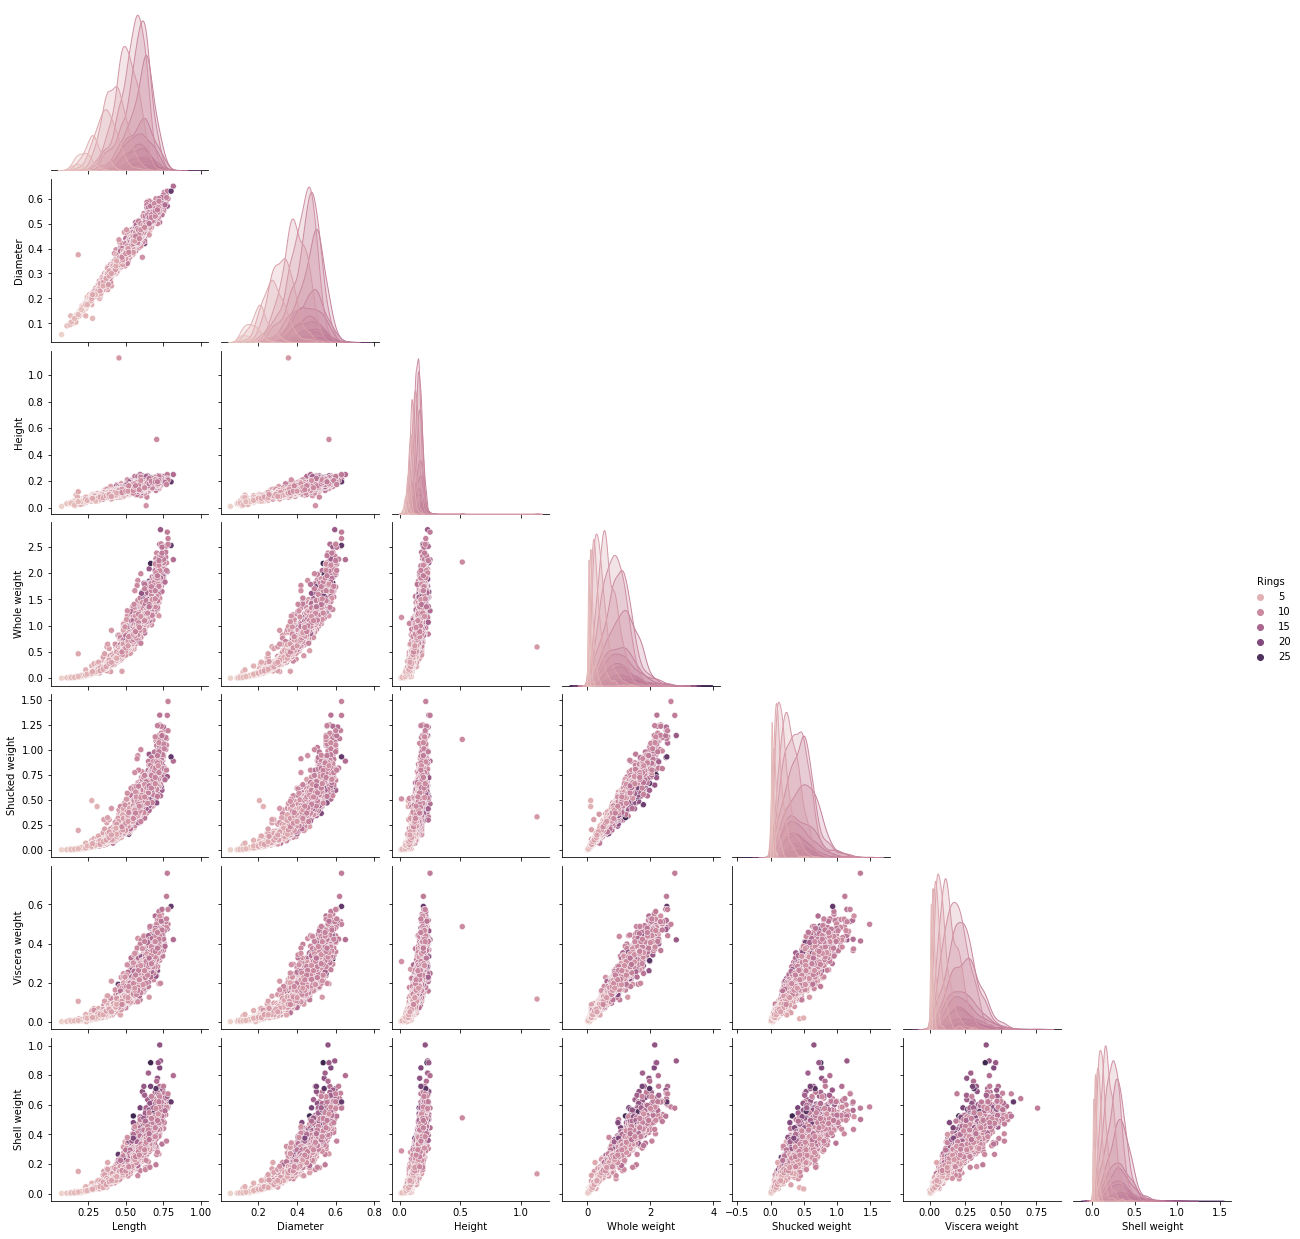

In [19]:
sns.pairplot(df, hue="Rings", corner=True)

Representación general del atributo Anillos

Con la ayuda de Seaborn, que es una biblioteca para hacer gráficos estadísticos en Python. Se basa en matplotlib y se integra estrechamente con las estructuras de datos de pandas. Seaborn ayuda a explorar y comprender sus datos para obtener información como el conteo (iteraciones de un atributo), grafica de densidad, grafica de probabilidad, grafica de distribución de atributos

Referencia: https://seaborn.pydata.org/tutorial/introduction

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


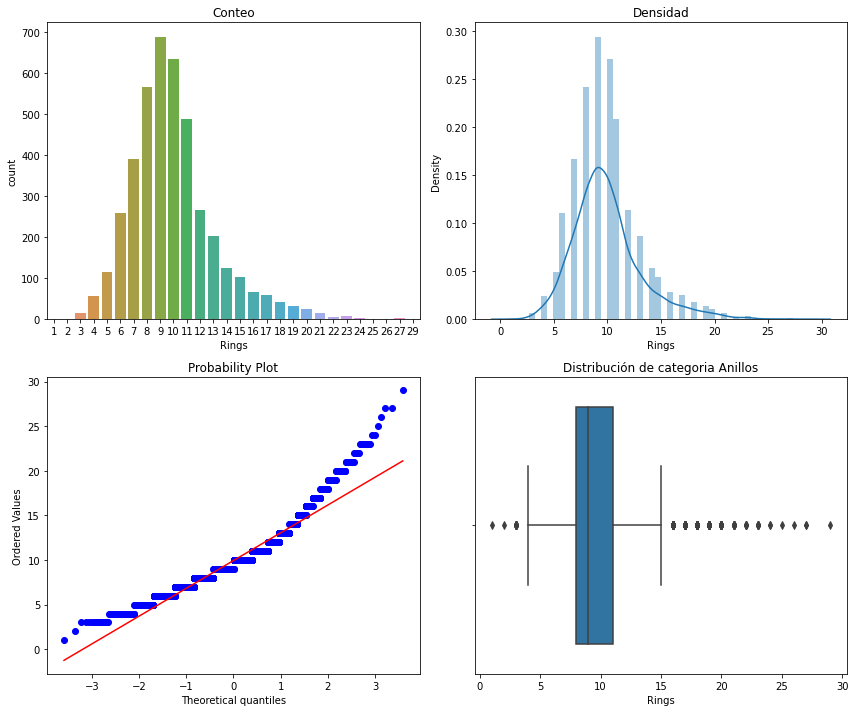

In [20]:
from scipy import stats

plt.figure(figsize=(12, 10))
# Se grafica el conteo
plt.subplot(2,2,1)
sns.countplot(df.Rings).set(title='Conteo')
# Se grafica la densidad
plt.subplot(2,2,2)
sns.distplot(df.Rings).set(title='Densidad')
# Se grafica de probabilidad
plt.subplot(2,2,3)
stats.probplot(df.Rings, plot=plt)
# Se grafica la distribución con respecto a la categoría anillos
plt.subplot(2,2,4)
sns.boxplot(df.Rings).set(title='Distribución de categoria Anillos')
plt.tight_layout()

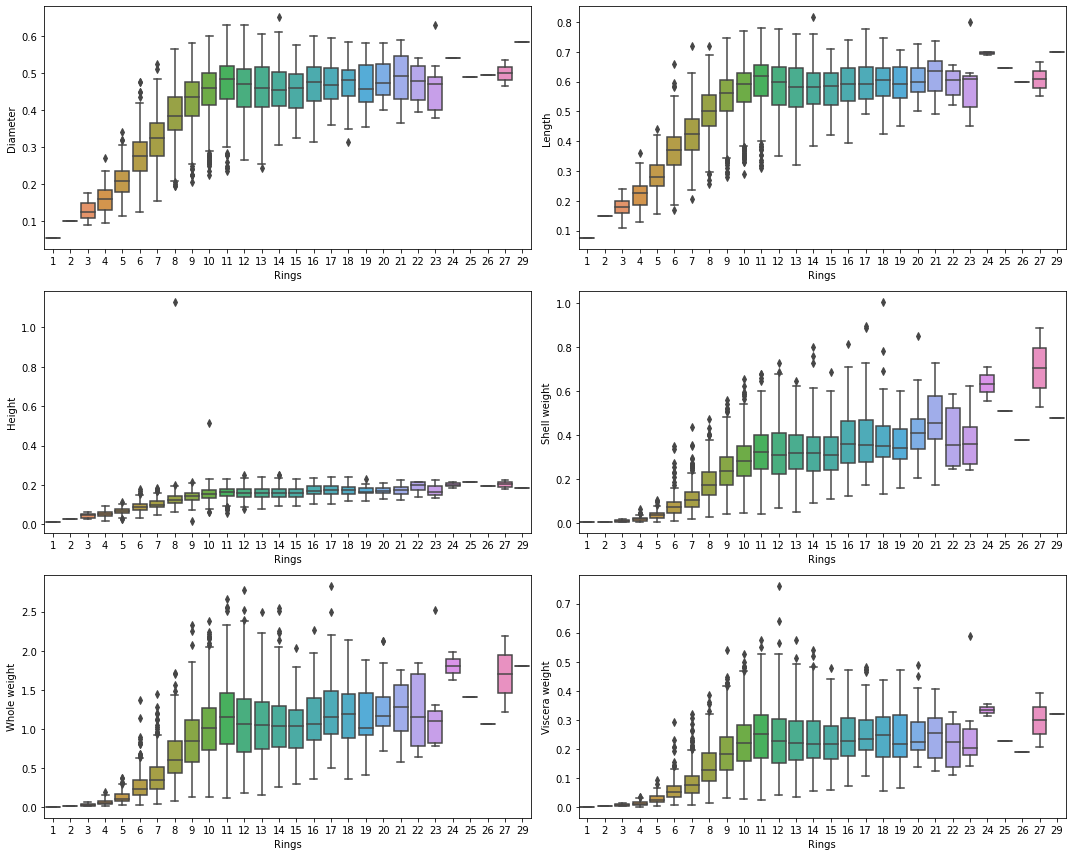

In [21]:
plt.figure(figsize=(15,12))

plt.subplot(3,2,1)
sns.boxplot(data= df, x = 'Rings', y = 'Diameter')

plt.subplot(3,2,2)
sns.boxplot(data= df, x = 'Rings', y = 'Length')

plt.subplot(3,2,3)
sns.boxplot(data= df, x = 'Rings', y = 'Height')

plt.subplot(3,2,4)
sns.boxplot(data= df, x = 'Rings', y = 'Shell weight')

plt.subplot(3,2,5)
sns.boxplot(data= df, x = 'Rings', y = 'Whole weight')

plt.subplot(3,2,6)
sns.boxplot(data= df, x = 'Rings', y = 'Viscera weight')
plt.tight_layout()

# Regresión

In [22]:
import numpy as np 
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Debido a que el atributo sexo es de tipo caracteristico y se desea realizar la predicción del número de anillos con todos los atributos, se debe realizar una clasificación de este atributo. Para esto inicialmente se realiza el conteo y calculo de porcentaje de los tipos de sexo existentes: 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Gráfico de genero - Male(Rojo), Infant(Azul) & Female (Morado)')]

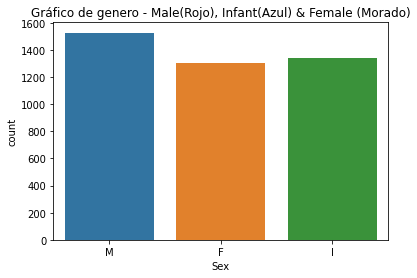

In [23]:
sns.countplot(df.Sex).set(title='Gráfico de genero - Male(Rojo), Infant(Azul) & Female (Morado)')

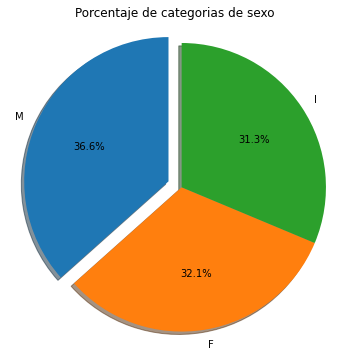

In [24]:
labels = df.Sex.unique().tolist()
sizes = df.Sex.value_counts().tolist()
explode = (0.1, 0, 0)
plt.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("Porcentaje de categorias de sexo")

plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

Se cargan las librerias, modelos y métricas a utilizar

In [25]:
from sklearn import linear_model

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [26]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

La columna "sexo" se divide en los 3 atributos, para cada característica codificada para evitar la denominada colinealidad (que una de las características sea una combinación lineal de las otras).

In [27]:
new_col = pd.get_dummies(df.Sex)
df[new_col.columns] = new_col
df.columns


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings', 'F', 'I', 'M'],
      dtype='object')

Se seleccionan los datos de entrenamiento y prueba. Se divide el conjunto de datos en 2:

*   **X** Datos de variables de entrada
*   **Y** Dato de variable de salida





In [28]:
X = df.drop(['Sex', 'Rings'], axis = 1)
Y = df.Rings

In [29]:
from sklearn.preprocessing import StandardScaler
convert = StandardScaler()
X = convert.fit_transform(X)

In [30]:
X.shape, Y.shape

((4175, 10), (4175,))

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 23, test_size = 0.30)

## Regresión Lineal

In [32]:
model_RL = linear_model.LinearRegression()
model_RL.fit(X_train, Y_train)

RL_R2= r2_score(Y_train, model_RL.predict(X_train))
RL_MSE= mean_squared_error(Y_train, model_RL.predict(X_train))

print('Error cuadratico medio Reg.Li:',RL_R2)
print('coeficiente de determinación Reg.Li:',RL_MSE, '(función de puntuación de regresión)' )



Error cuadratico medio Reg.Li: 0.5517074616553699
coeficiente de determinación Reg.Li: 4.659472620815433 (función de puntuación de regresión)


De acuerdo con la gráfica de distribución, se puede ver que el atributo Rings es probable obtener una buena predicción entre 3 y 15.Debido a esto se realiza la selección de estos datos y validar resultados.

In [33]:
df_RL2 = df[df.Rings < 16]
df_RL2 = df_RL2[df.Rings > 2]
df_RL2 = df_RL2[df.Height < 0.4]

<ipython-input-33-cc331de31755>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_RL2 = df_RL2[df.Rings > 2]
<ipython-input-33-cc331de31755>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_RL2 = df_RL2[df.Height < 0.4]


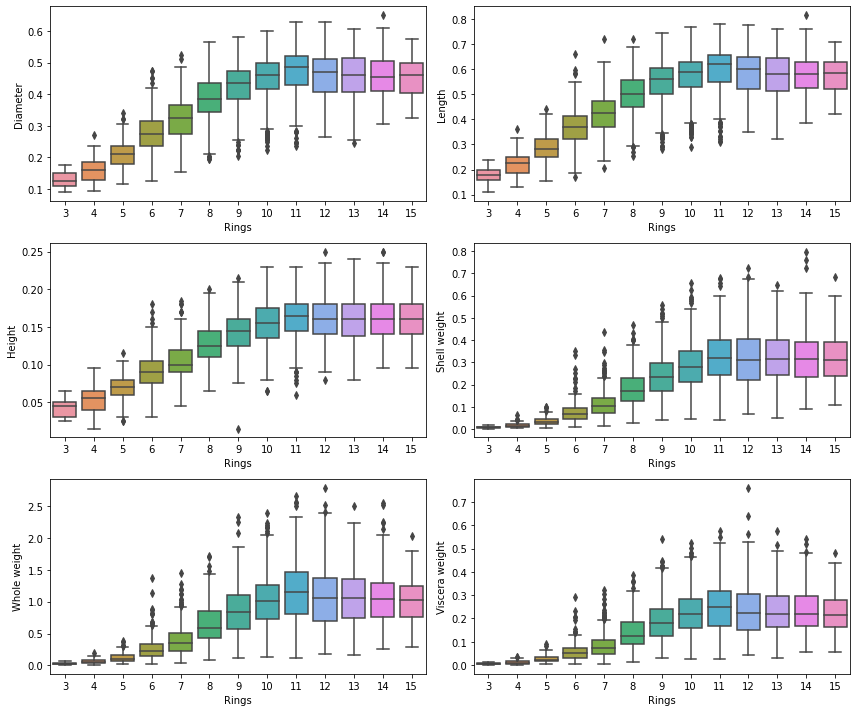

In [34]:
plt.figure(figsize=(12,10))

plt.subplot(3,2,1)
sns.boxplot(data= df_RL2, x = 'Rings', y = 'Diameter')

plt.subplot(3,2,2)
sns.boxplot(data= df_RL2, x = 'Rings', y = 'Length')

plt.subplot(3,2,3)
sns.boxplot(data= df_RL2, x = 'Rings', y = 'Height')

plt.subplot(3,2,4)
sns.boxplot(data= df_RL2, x = 'Rings', y = 'Shell weight')

plt.subplot(3,2,5)
sns.boxplot(data= df_RL2, x = 'Rings', y = 'Whole weight')

plt.subplot(3,2,6)
sns.boxplot(data= df_RL2, x = 'Rings', y = 'Viscera weight')
plt.tight_layout()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


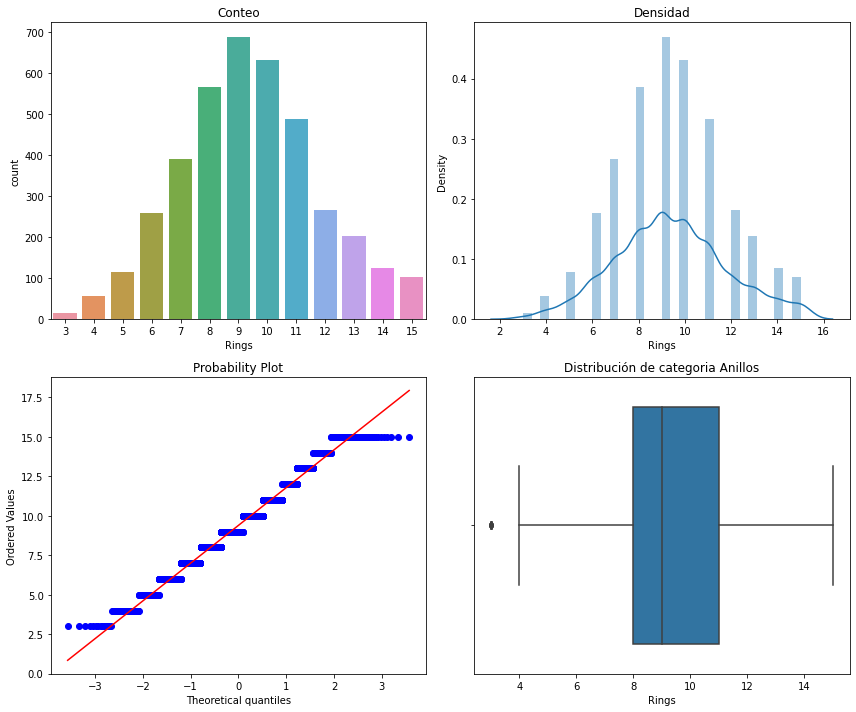

In [35]:
plt.figure(figsize=(12, 10))

plt.subplot(2,2,1)
sns.countplot(df_RL2.Rings).set(title='Conteo')

plt.subplot(2,2,2)
sns.distplot(df_RL2.Rings).set(title='Densidad')

plt.subplot(2,2,3)
stats.probplot(df_RL2.Rings, plot=plt)

plt.subplot(2,2,4)
sns.boxplot(df_RL2.Rings).set(title='Distribución de categoria Anillos')
plt.tight_layout()

In [36]:
df_RL2.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings', 'F', 'I', 'M'],
      dtype='object')

In [37]:
X_RL2 = df_RL2.drop(['Sex', 'Rings'], axis = 1)
Y_RL2 = df_RL2.Rings

In [38]:
from sklearn.preprocessing import StandardScaler
convert = StandardScaler()
X_RL2 = convert.fit_transform(X_RL2)

In [39]:
X_RL2.shape, Y_RL2.shape

((3910, 10), (3910,))

In [40]:
from sklearn.model_selection import train_test_split
X_train_RL2, X_test_RL2, Y_train_RL2, Y_test_RL2 = train_test_split(X_RL2, Y_RL2, random_state = 23, test_size = 0.30)

In [41]:
model_RL2 = linear_model.LinearRegression()
model_RL2.fit(X_train_RL2, Y_train_RL2)
RL2_R2= r2_score(Y_train_RL2, model_RL2.predict(X_train_RL2))
RL2_MSE= mean_squared_error(Y_train_RL2, model_RL2.predict(X_train_RL2))

print('Resultados con regresión lineal con datos completos')
print('Error cuadratico medio Reg.Li:',RL_R2)
print('coeficiente de determinación Reg.Li:',RL_MSE, '(función de puntuación de regresión)' )
print('//////////////////')
print('Resultados con regresión lineal con datos seleccionados')
print('Error cuadratico medio Reg.Li:',RL2_R2)
print('coeficiente de determinación Reg.Li:',RL2_MSE, '(función de puntuación de regresión)' )

Resultados con regresión lineal con datos completos
Error cuadratico medio Reg.Li: 0.5517074616553699
coeficiente de determinación Reg.Li: 4.659472620815433 (función de puntuación de regresión)
//////////////////
Resultados con regresión lineal con datos seleccionados
Error cuadratico medio Reg.Li: 0.5348898350451838
coeficiente de determinación Reg.Li: 2.7843533664623425 (función de puntuación de regresión)


## Arboles de decisión

In [42]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor()
tree_model.fit(X_train_RL2, Y_train_RL2)
TM_R2=r2_score(Y_train_RL2, tree_model.predict(X_train_RL2)) 
TM_MSE= mean_squared_error(Y_train_RL2, tree_model.predict(X_train_RL2))

R2_AD= r2_score(Y_test_RL2, tree_model.predict(X_test_RL2)) 
MSE_AD= mean_squared_error(Y_test_RL2, tree_model.predict(X_test_RL2)) 

print('Resultados con arboles de decisión con datos seleccionados')
print('Error cuadratico medio A.D:'+str(MSE_AD))
print('coeficiente de determinación Reg.Li:'+str(R2_AD), '(función de puntuación de regresión)' )


Resultados con arboles de decisión con datos seleccionados
Error cuadratico medio A.D:4.913043478260869
coeficiente de determinación Reg.Li:0.09606733069178142 (función de puntuación de regresión)


## Ridge Regression

In [43]:
ridge_model = linear_model.Ridge()
ridge_model.fit(X_train_RL2, Y_train_RL2)
R2_RR= r2_score(Y_train_RL2, ridge_model.predict(X_train_RL2))
MSE_RR= mean_squared_error(Y_train_RL2, ridge_model.predict(X_train_RL2))

print('Resultados con Ridge Regression con datos seleccionados')
print('Error cuadratico medio A.D:'+str(MSE_RR))
print('coeficiente de determinación Reg.Li:'+str(R2_RR), '(función de puntuación de regresión)' )


Resultados con Ridge Regression con datos seleccionados
Error cuadratico medio A.D:2.7844910161972294
coeficiente de determinación Reg.Li:0.5348668414511701 (función de puntuación de regresión)


## Regresión con Vecinos Cercanos

In [44]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix

model_KNN = KNeighborsRegressor(n_neighbors=1)
model_KNN.fit(X_train, Y_train)
Y_pred_KNN = model_KNN.predict(X_test)

Y_pred_KNN

KNN_matriz = confusion_matrix(Y_test, Y_pred_KNN)
KNN_ACC = accuracy_score(Y_test, Y_pred_KNN)
KNN_MSE = mean_squared_error(Y_test, Y_pred_KNN)

print('Matrix de confusión KNN:')
print(KNN_matriz)
print('Exactitud KNN:',KNN_ACC)
print('Error cuadratico medio KNN:',KNN_MSE)

Matrix de confusión KNN:
[[ 0  4  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  7  4  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  9  6  7  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  2  8 15 28  7  1  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  3 36 35 29 16  9  4  3  1  1  2  1  0  0  0  0  0  0  0  0]
 [ 0  0  0 12 22 41 45 20  7  8  2  4  3  1  1  0  1  0  0  0  0  0]
 [ 0  0  3  5 15 38 42 42 35 11  3  6  1  3  1  1  1  0  0  0  0  0]
 [ 0  0  0  1  2 23 38 45 27 16  9  6  6  1  1  4  1  0  0  0  0  0]
 [ 0  0  0  1  3  9 35 22 29 16  7  5  3  2  3  1  0  3  1  1  0  0]
 [ 0  0  0  2  1  4 13 17 16 12  5  1  2  3  1  1  0  1  0  1  0  0]
 [ 0  0  0  0  1  6  7 16 14  8  9  4  3  3  0  0  2  2  1  0  0  0]
 [ 0  0  0  0  0  3  4  5  8  4  4  1  0  2  1  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  2  8  7  1  2  5  1  2  2  3  1  0  1  2  0  0  0]
 [ 0  0  0  0  0  0  1  4  0  1  3  1  2  0  3  1  0  1  0  0  0  0]
 [ 0  0  

In [45]:
model_KNN2 = KNeighborsRegressor(n_neighbors=2)
model_KNN2.fit(X_train_RL2, Y_train_RL2)
Y_pred_KNN2 = model_KNN.predict(X_test_RL2)

Y_pred_KNN2

KNN2_matriz = confusion_matrix(Y_test_RL2, Y_pred_KNN2)
KNN2_ACC = accuracy_score(Y_test_RL2, Y_pred_KNN2)
KNN2_MSE = mean_squared_error(Y_test_RL2, Y_pred_KNN2)

print('Matrix de confusión KNN:')
print(KNN2_matriz)
print('Exactitud KNN:',KNN2_ACC)
print('Error cuadratico medio KNN:',KNN2_MSE)

Matrix de confusión KNN:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  1   0   2   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   1   9   2   2   2   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   1   7  11   5   3   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   1   8  49  17   2   1   0   0   1   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   2  18  82  16   2   1   0   1   0   1   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   4  10 130  12   9   8   2   0   2   0   0   0   0   0
    0   0   1]
 [  0   0   0   0   4   2  14 150  12  15   6   3   2   0   1   0   0   0
    0   0   0]
 [  0   0   0   0   0   2   1  11 147  11   5   4   0   2   2   0   0   2
    2   0   0]
 [  0   0   0   0   0   1   3  11  13 104   8   4   2   0   0   2   1   0
    2   0   0]
 [  0   0   0   0   0   0   2   2   9   4  58   0   1   1   0   2   0   0
    2   0  

# Clasificación

Se define los datos de entrada y salida para los datos de entrenamineta y prueba en los metodos de clasificación

In [46]:
dfc=df_RL2
dfc.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings', 'F', 'I', 'M'],
      dtype='object')

In [47]:
XC = dfc.drop(['Sex', 'Rings'], axis = 1)
YC = dfc.Rings

XC_train, XC_test, YC_train, YC_test = train_test_split(XC, YC, test_size=0.25)

Se hace el llamado de metodo, métricas y librerias que se usarán para los metodos de clasificación:

In [48]:
from sklearn.linear_model import LogisticRegression # Regresión logistica
from sklearn.neighbors import KNeighborsClassifier  # Vecinos más cercanos
from sklearn.naive_bayes import GaussianNB          # Clasificador Bayesiano

from sklearn.metrics import confusion_matrix        # Matriz de confusión
from sklearn.metrics import accuracy_score          # Exactitud
from sklearn.metrics import mean_squared_error      # Error cuadratico 

## Regresión Logistica

In [49]:
RLog = LogisticRegression(multi_class = 'multinomial')

RLog.fit(XC_train, YC_train)
YC_RLog = RLog.predict(XC_test)

RLOG_Matrix = confusion_matrix(YC_test, YC_RLog)
RLOG_ACC = accuracy_score(YC_test, YC_RLog)
RLOG_MSE = mean_squared_error(YC_test, YC_RLog)

print('Resultados de clasificación con regresión logistica con datos seleccionados')
print('Matriz de confusión:'  ,RLOG_Matrix)
print('Exactitud del modelo:'   ,RLOG_ACC)
print('Error cuadratico medio:'   ,RLOG_MSE)


Resultados de clasificación con regresión logistica con datos seleccionados
Matriz de confusión: [[ 0  0  5  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  6  1  0  0  0  0  0  0  0  0]
 [ 0  0  3 16  9  0  0  0  0  0  0  0  0]
 [ 0  0  1 24 22  4  4  1  0  0  0  0  0]
 [ 0  0  0 18 39 21 19  1  1  0  0  0  0]
 [ 0  0  0  6 29 55 53 15  0  0  0  0  0]
 [ 0  0  0  2 15 44 74 40  7  0  0  0  0]
 [ 0  0  0  1 12 13 47 64 18  0  0  0  0]
 [ 0  0  0  0  2  6 29 46 30  0  0  0  0]
 [ 0  0  0  0  1  4 21 29 15  0  0  0  0]
 [ 0  0  0  0  1  2  8 21 13  0  0  0  0]
 [ 0  0  0  0  1  5  5 21  4  0  0  0  0]
 [ 0  0  0  0  0  2  5 11  4  0  0  0  0]]
Exactitud del modelo: 0.2955010224948875
Error cuadratico medio: 3.4662576687116564


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Clasificador KNN (Vecinos cercanos)

In [50]:
CLKNN = KNeighborsClassifier(n_neighbors = 5)
CLKNN.fit(XC_train, YC_train)
YC_CLKNN = CLKNN.predict(XC_test)

CLKNN_Matrix = confusion_matrix(YC_test, YC_CLKNN)
CLKNN_ACC = accuracy_score(YC_test, YC_CLKNN)
CLKNN_MSE = mean_squared_error(YC_test, YC_CLKNN)

print('Resultados de clasificación con metodo KNN con datos seleccionados')
print('Matriz de confusión:'  ,CLKNN_Matrix)
print('Exactitud del modelo:'   ,CLKNN_ACC)
print('Error cuadratico medio:'   ,CLKNN_MSE)

Resultados de clasificación con metodo KNN con datos seleccionados
Matriz de confusión: [[ 0  5  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  4  2  0  0  0  0  0  0  0  0  0]
 [ 0  6  5  9  7  0  0  1  0  0  0  0  0]
 [ 0  1 13 15 19  4  2  0  2  0  0  0  0]
 [ 0  1  3 23 33 22 15  1  0  0  1  0  0]
 [ 0  0  0 17 33 53 31 11  7  3  2  0  1]
 [ 0  0  1  5 13 52 50 42 16  1  1  0  1]
 [ 0  0  0  3  4 24 57 35 19  7  4  0  2]
 [ 0  0  0  2  1 12 25 32 25 10  3  2  1]
 [ 0  0  0  0  1  4 19 16 13  8  5  2  2]
 [ 0  0  0  0  1  2  5 13 14  7  2  1  0]
 [ 0  0  0  0  2  7  6 10  2  5  4  0  0]
 [ 0  0  0  0  0  1  8  4  3  2  1  3  0]]
Exactitud del modelo: 0.23415132924335377
Error cuadratico medio: 3.8374233128834354


## Naive Bayes (Clasificador Bayessiano)

In [51]:
CLBayes = GaussianNB()

CLBayes.fit(XC_train, YC_train)
YC_CLBayes = CLBayes.predict(XC_test)

CLBayes_Matrix = confusion_matrix(YC_test, YC_CLBayes)
CLBayes_ACC = accuracy_score(YC_test, YC_CLBayes)
CLBayes_MSE = mean_squared_error(YC_test, YC_CLBayes)

print('Resultados de clasificación con metodo Naive Bates con datos seleccionados')
print('Matriz de confusión:'  ,CLBayes_Matrix)
print('Exactitud del modelo:'   ,CLBayes_ACC)
print('Error cuadratico medio:'   ,CLBayes_MSE)

Resultados de clasificación con metodo Naive Bates con datos seleccionados
Matriz de confusión: [[ 5  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  7  0  0  0  0  0  0  0  0  0  0  0]
 [ 1 12  7  6  2  0  0  0  0  0  0  0  0]
 [ 0 11 15 18  7  3  2  0  0  0  0  0  0]
 [ 1  5  6 33 32 16  4  0  2  0  0  0  0]
 [ 0  1  0 25 40 46 24 18  4  0  0  0  0]
 [ 0  1  0  6 31 44 28 46 26  0  0  0  0]
 [ 0  0  3  3 14 26 23 44 38  4  0  0  0]
 [ 0  0  1  1  5  8 22 26 43  7  0  0  0]
 [ 0  0  0  0  5 13 10 12 24  5  0  0  1]
 [ 0  0  0  0  2  8  7 12 14  2  0  0  0]
 [ 0  0  0  1  2  8  4 10 10  1  0  0  0]
 [ 0  0  0  0  1  4  4  7  6  0  0  0  0]]
Exactitud del modelo: 0.24028629856850717
Error cuadratico medio: 4.3885480572597135


Luego de realizar clasificación con 3 metodos (Regresión logistica, vecinos cercanos y clasificador bayessiano), se evidenció que se obtiene mejor resultado con la regresión lógistica. Resultados de clasificación:

Regresión logistica con datos seleccionados:
*   Exactitud del modelo: 0.28118609406952966
*   Error cuadratico medio: 3.6881390593047034

Metodo KNN con datos seleccionados:
*   Exactitud del modelo: 0.23824130879345604
*   Error cuadratico medio: 4.006134969325154

Metodo Naive Bates con datos seleccionados:
*   Exactitud del modelo: 0.24335378323108384
*   Error cuadratico medio: 4.572597137014315


















# Redes Neuronales

In [52]:
import numpy as np 
import pandas as pd 
import os
from sklearn import linear_model
from sklearn import model_selection
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
plt.style.use('fivethirtyeight') 
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import logit, probit, poisson, ols
from sklearn import datasets

In [53]:
print(df_ANN.columns)

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')


In [54]:
df_ANN[df_ANN.Height == 0]
df_ANN = df_ANN[df_ANN.Height != 0]
df_ANN.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4175.000000,4175.00000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000
mean,0.524065,0.40794,0.139583,0.829005,0.359476,0.180653,0.238834,9.935090
std,0.120069,0.09922,0.041725,0.490349,0.221954,0.109605,0.139212,3.224227
min,0.075000,0.05500,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.35000,0.115000,0.442250,0.186250,0.093500,0.130000,8.000000
50%,0.545000,0.42500,0.140000,0.800000,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.48000,0.165000,1.153500,0.502000,0.253000,0.328750,11.000000
max,0.815000,0.65000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Debido a que el atributo sex es categorico, se convierte a númerico para facilitar el metodo.

In [55]:
sex_dictionary = {'M': 1, 'F' : 2,'I':3}
df_ANN['Sex'] = df_ANN['Sex'].apply(lambda x: sex_dictionary[x])

<ipython-input-55-aaca7d13671c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ANN['Sex'] = df_ANN['Sex'].apply(lambda x: sex_dictionary[x])


In [56]:
df_ANN.dtypes

Sex                 int64
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

La edad es clasificada basado en el número de anillos:

In [57]:
def label_race (row):
   if row['Rings']>=1 and row['Rings']<=8:
      return 1
   elif row['Rings'] >=9 and row['Rings']<=10:
      return 2
   elif row['Rings']>=11 and row['Rings']<=29:
      return 3
   return 0

In [58]:
df_ANN['Age'] = df_ANN.apply(lambda _: '', axis=1)

<ipython-input-58-66c41ac83685>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ANN['Age'] = df_ANN.apply(lambda _: '', axis=1)


In [59]:
df_ANN['Age']= df_ANN.apply(lambda row: label_race (row),axis=1)

<ipython-input-59-5f788b0eab7f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ANN['Age']= df_ANN.apply(lambda row: label_race (row),axis=1)


In [60]:
df_ANN.Sex = df_ANN.Sex.astype(float)
df_ANN

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,3
1,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,1
2,2.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,2
3,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,2
4,3.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1
...,...,...,...,...,...,...,...,...,...,...
4172,2.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,3
4173,1.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,2
4174,1.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,2
4175,2.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,2


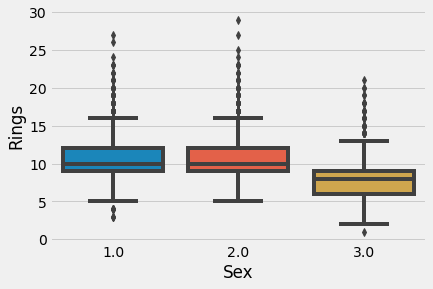

In [61]:
ax = sns.boxplot(x="Sex", y="Rings", data=df_ANN)

Esta clase mapea un conjunto de datos en varios ejes dispuestos en una cuadrícula de filas y columnas que corresponden a niveles de variables en el conjunto de datos.

Referencia: https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


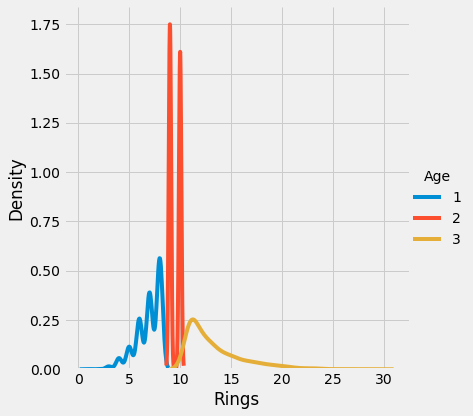

In [62]:
sns.FacetGrid(df_ANN, hue="Age", size=6) \
   .map(sns.kdeplot, "Rings") \
   .add_legend()

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


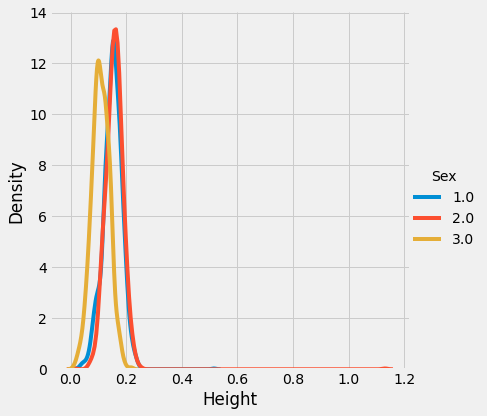

In [63]:
sns.FacetGrid(df_ANN, hue="Sex", size=6) \
   .map(sns.kdeplot, "Height") \
   .add_legend()

Se define el axis X eliminando Age y Rings

In [64]:
Y = df_ANN[['Age']]
X = df_ANN.drop(['Age','Rings'], axis=1) 

En la siguiente grafica se realiza la relación entre atributos y anillos

<Figure size 432x288 with 0 Axes>

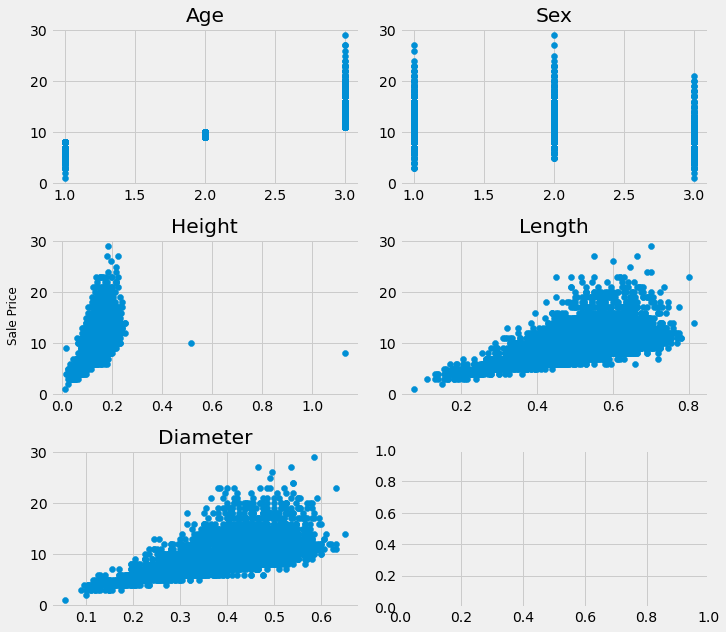

In [65]:
plt.figure(1)
f, axarr = plt.subplots(3, 2, figsize=(10, 9))
ring = df_ANN.Rings.values
axarr[0, 0].scatter(df_ANN.Age.values, ring)
axarr[0, 0].set_title('Age')
axarr[0, 1].scatter(df_ANN.Sex.values, ring)
axarr[0, 1].set_title('Sex')
axarr[1, 0].scatter(df_ANN.Height.values, ring)
axarr[1, 0].set_title('Height')
axarr[1, 1].scatter(df_ANN.Length.values, ring)
axarr[1, 1].set_title('Length')
axarr[2, 0].scatter(df_ANN.Diameter.values, ring)
axarr[2, 0].set_title('Diameter')
f.text(-0.01, 0.5, 'Sale Price', va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


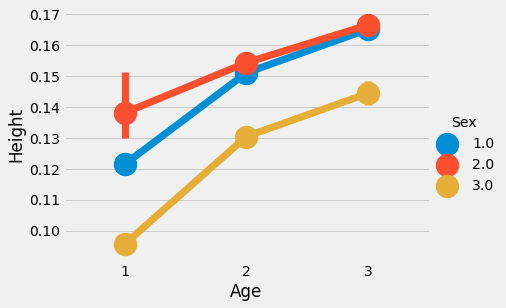

In [66]:
sns.factorplot('Age', 'Height', hue = 'Sex', estimator = np.mean, data = df_ANN, 
             size = 4.5, aspect = 1.4)

Se determina que los de sexo femenino tienen mayor altura

In [67]:
from sklearn.model_selection import train_test_split
train_ANN_X, test_ANN_X, train_ANN_y, test_ANN_y = train_test_split(X, Y, random_state = 23, test_size = 0.30) # splits 75%/25% by default

In [68]:
print("train_df_ANN_x:")
print(train_ANN_X.shape)

print("train_df_ANN_y:")
print(train_ANN_y.shape)

print("test_df_ANN_x:")
print(test_ANN_X.shape)

print("test_df_ANN_y:")
print(test_ANN_y.shape)

train_df_ANN_x:
(2922, 8)
train_df_ANN_y:
(2922, 1)
test_df_ANN_x:
(1253, 8)
test_df_ANN_y:
(1253, 1)


In [69]:
def getAccuracy(testSet, predictions):

    correct = 0

    for x in range(len(testSet)):

        if testSet[x][-1] == predictions[x]:

            correct += 1

    return (correct/float(len(testSet))) * 100.0

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import median_absolute_error

#neural network
scaler = StandardScaler()

scaler.fit(train_ANN_X)
train_ANN_X = scaler.transform(train_ANN_X)
test_ANN_X = scaler.transform(test_ANN_X)

neural_network_class=MLPClassifier(hidden_layer_sizes=(20,10,20))
neural_network_class.fit(train_ANN_X,train_ANN_y)
predictions = neural_network_class.predict(test_ANN_X)
y_pred = predictions

#Se calcula Confusion Matrix
print("Matrix de Confusion")
confusion_matrix = metrics.confusion_matrix(test_ANN_y, y_pred)

#Precisión
print("Presición de la red neuronal")
print(accuracy_score(test_ANN_y, y_pred)*100)

#Mean Absolute Error 
mae = MAE(test_ANN_y,y_pred)
print("MAE (Error absoluto medio):"+str(mae))

#RMSE 
rmse = mean_squared_error(test_ANN_y,y_pred)
print("RMSE (Error cuadratico medio):"+str(rmse))

print("Informe de clasificación para datos de prueba %s:\n%s\n\n"
     % (scaler, metrics.classification_report(test_ANN_y, y_pred)))

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Matrix de Confusion
Presición de la red neuronal
67.83719074221868
MAE (Error absoluto medio):0.3503591380686353
RMSE (Error cuadratico medio):0.40782122905027934
Informe de clasificación para datos de prueba StandardScaler():
              precision    recall  f1-score   support

           1       0.79      0.76      0.77       423
           2       0.52      0.55      0.53       387
           3       0.72      0.71      0.72       443

    accuracy                           0.68      1253
   macro avg       0.68      0.67      0.68      1253
weighted avg       0.68      0.68      0.68      1253





/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Random Forest

Random forest también conocidos como '"Bosques Aleatorios"' es una combinación de árboles predictores tal que cada árbol depende de los valores de un vector aleatorio probado independientemente y con la misma distribución para cada uno de estos.

Referencia: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [71]:
#Random Forest
rf = RandomForestClassifier(n_jobs=2)
rf.fit(train_ANN_X, train_ANN_y)
preds = rf.predict_proba(test_ANN_X)[:,1]
y_pred=rf.predict(test_ANN_X)


#calculo de la matrix de Confusion
print("Matrix de confusión")
metrics.confusion_matrix(test_ANN_y, y_pred)

#Precisión
print("Precisión de la red neuronal")
print(accuracy_score(test_ANN_y, y_pred)*100)

#Mean Absolute Error 
mae = MAE(test_ANN_y,y_pred)
print("Error absoluto medio:"+str(mae))

#RMSE 
rmse = mean_squared_error(test_ANN_y,y_pred)
print("RMSE (Error medio cuadratico):"+str(rmse))

print("Informe de clasificación para datos de prueba %s:\n%s\n\n"
     % (rf, metrics.classification_report(test_ANN_y, y_pred)))

<ipython-input-71-af3a3555e93e>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(train_ANN_X, train_ANN_y)


Matrix de confusión
Precisión de la red neuronal
65.20351157222666
Error absoluto medio:0.3790901835594573
RMSE (Error medio cuadratico):0.441340782122905
Informe de clasificación para datos de prueba RandomForestClassifier(n_jobs=2):
              precision    recall  f1-score   support

           1       0.79      0.74      0.76       423
           2       0.49      0.53      0.51       387
           3       0.69      0.67      0.68       443

    accuracy                           0.65      1253
   macro avg       0.65      0.65      0.65      1253
weighted avg       0.66      0.65      0.66      1253



